In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [8]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)

In [9]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
y = iris['target']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Apply Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
treeClassifier = DecisionTreeClassifier()

In [14]:
treeClassifier.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]')

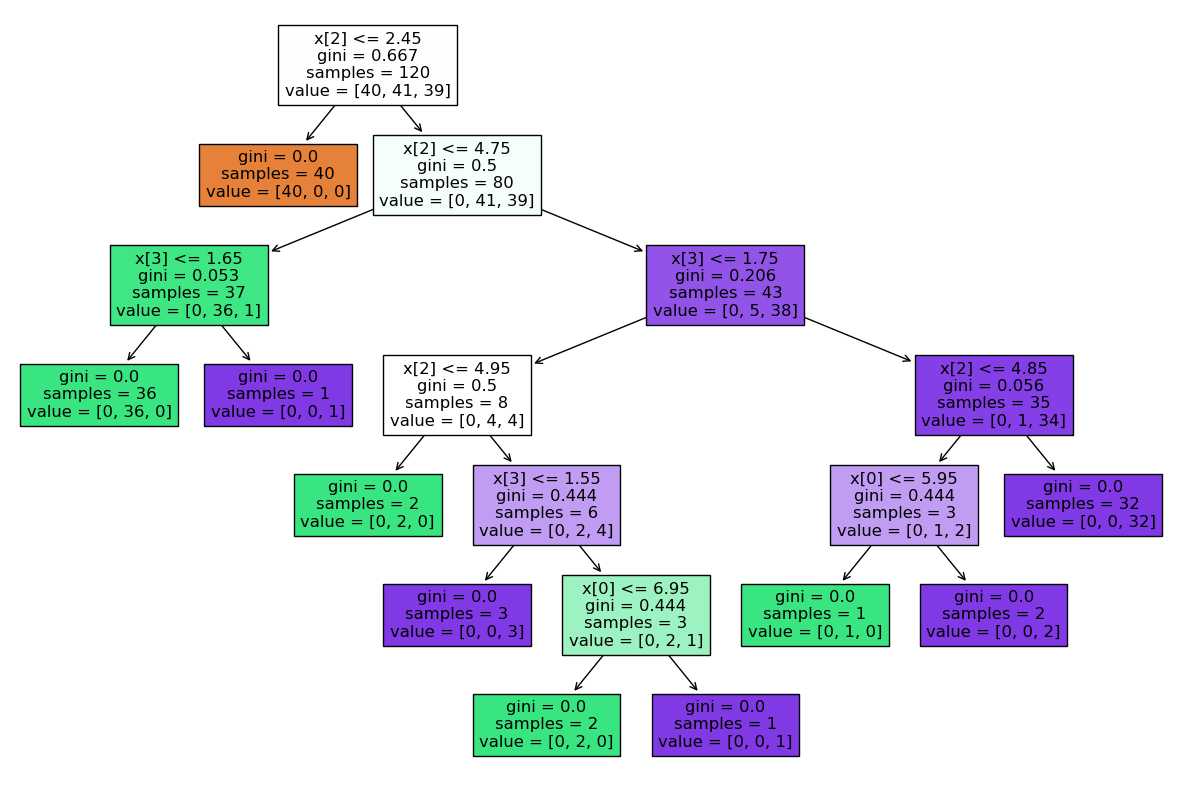

In [15]:
# Visualize the Decison Tree
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(treeClassifier, filled=True)

# Post Prunning
* Generally It overfit so use we Pruning technique
* Here I'm using Post Prunning

In [16]:
# Apply Decision Tree Classifier with Post Prunning
from sklearn.tree import DecisionTreeClassifier
treeClassifierPostPrunning = DecisionTreeClassifier(max_depth=2)

In [18]:
treeClassifierPostPrunning.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.206\nsamples = 43\nvalue = [0, 5, 38]')]

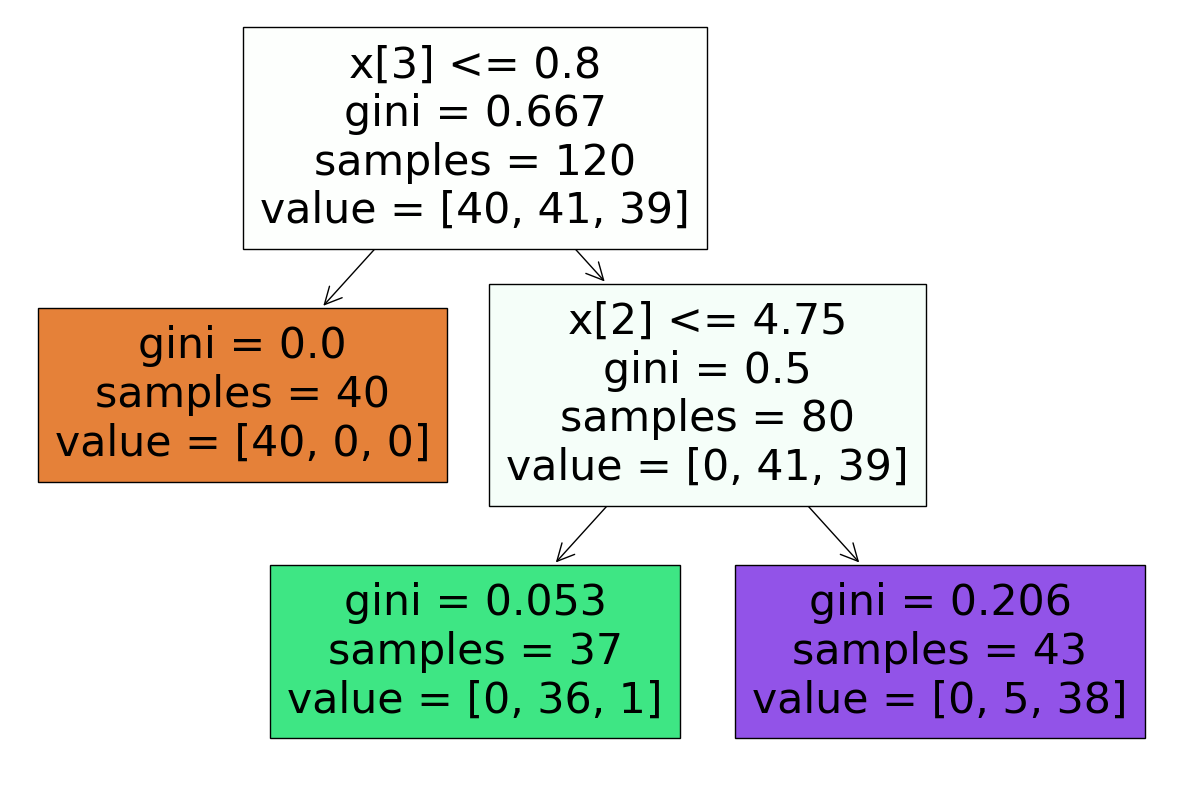

In [19]:
# Visualize the Decison Tree
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(treeClassifierPostPrunning, filled=True)

In [20]:
y_pred = treeClassifierPostPrunning.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [24]:
from sklearn.model_selection import cross_val_score

In [34]:
np.mean(cross_val_score(treeClassifierPostPrunning, X_train, y_train, cv=5))

0.9166666666666667

# Decision Tree Classifier Prepruning And Hyperparameter Tuning

In [35]:
param = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
treemodel = DecisionTreeClassifier()

In [38]:
grid = GridSearchCV(treemodel, param_grid=param, cv=5, scoring='accuracy')

In [40]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [41]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [42]:
grid.best_score_

0.95

In [43]:
grid_pred = grid.predict(X_test)

In [44]:
confusion_matrix(y_test, grid_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [45]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [46]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, grid_pred)

In [47]:
score

1.0